# **We will be comparing several ML algorithms for build regression models of BcHE inhibitors.**

In [1]:
! pip install lazypredict


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [27]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [28]:
import os
folder_path = "/content/drive/My Drive/Bioactivity_Analysis"



In [30]:
import pandas as pd
df = pd.read_csv(f"{folder_path}/BcHE_06_bioactivity_data_3class_pIC50_pubchem_fp.csv")
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.04
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.05
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.00
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.21
4062,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.52
4063,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.52
4064,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.93


In [31]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

# **Data pre-processing**

In [32]:
X.shape

(4066, 881)

In [33]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4066, 146)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Compare different ML algorithms**

In [35]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [01:16<00:01,  1.52s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 3252, number of used features: 146
[LightGBM] [Info] Start training from score 5.760821


100%|██████████| 42/42 [01:17<00:00,  1.85s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:57<00:00,  1.43it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 3252, number of used features: 146
[LightGBM] [Info] Start training from score 5.760821


100%|██████████| 42/42 [00:57<00:00,  1.37s/it]


In [37]:

# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.89,0.90,0.50,0.28
ExtraTreeRegressor,0.89,0.90,0.50,0.17
ExtraTreesRegressor,0.89,0.90,0.50,7.66
GaussianProcessRegressor,0.89,0.90,0.50,7.36
XGBRegressor,0.86,0.87,0.56,1.38
RandomForestRegressor,0.85,0.86,0.58,5.85
BaggingRegressor,0.84,0.84,0.61,0.78
MLPRegressor,0.79,0.80,0.69,11.28
HistGradientBoostingRegressor,0.71,0.72,0.82,1.79


In [38]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.49,0.58,0.92,0.35
RandomForestRegressor,0.49,0.58,0.93,5.93
HistGradientBoostingRegressor,0.48,0.58,0.93,1.16
XGBRegressor,0.47,0.57,0.94,0.37
BaggingRegressor,0.45,0.55,0.96,0.62
SVR,0.40,0.50,1.00,1.62
NuSVR,0.40,0.50,1.00,1.35
KNeighborsRegressor,0.39,0.50,1.01,0.12
MLPRegressor,0.37,0.48,1.03,6.17


# **Data visualization of model performance**

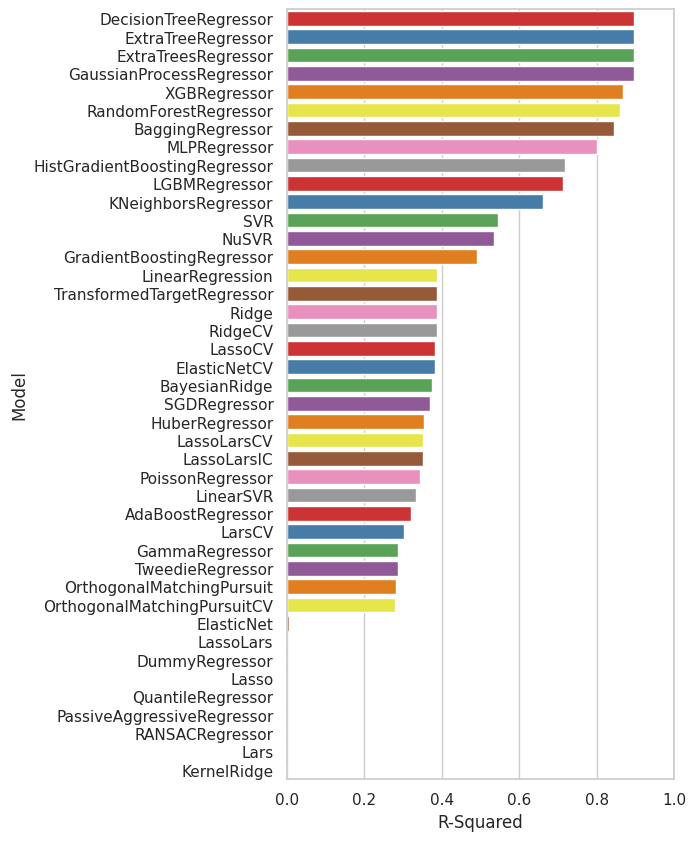

In [40]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train, palette="Set1")
ax.set(xlim=(0, 1))
plt.show()

[(0.0, 10.0)]

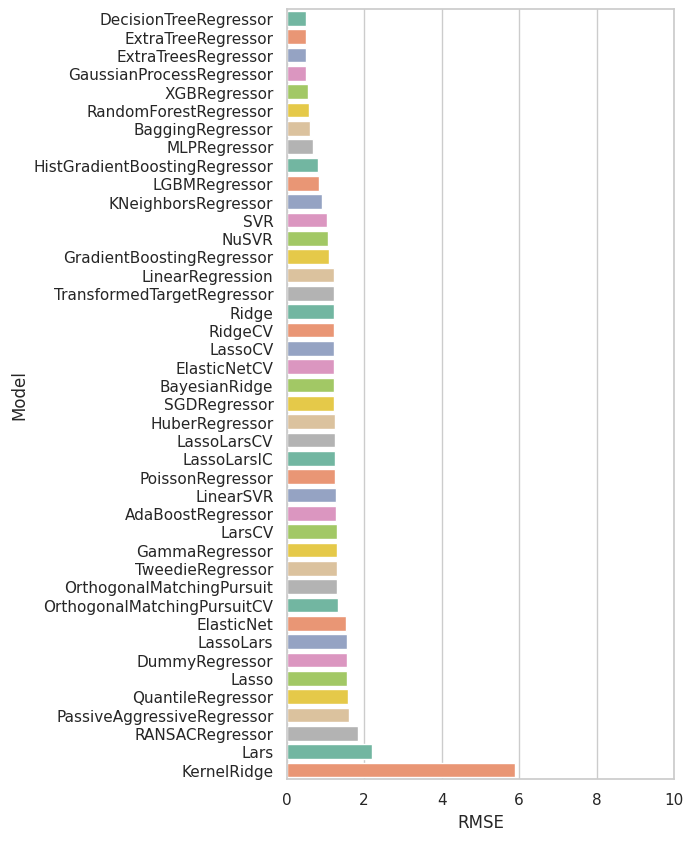

In [42]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train, palette="Set2")
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

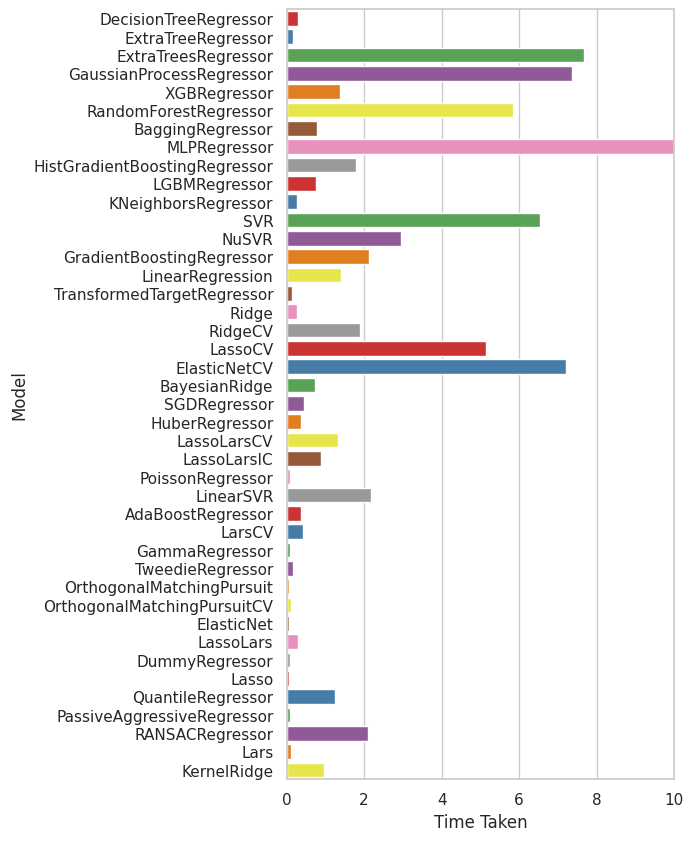

In [45]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train,palette="Set1")
ax.set(xlim=(0, 10))